In [565]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked

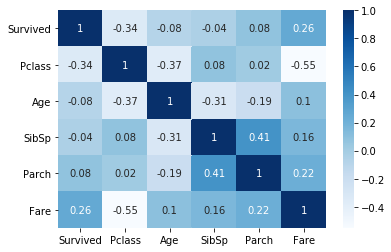

In [566]:
raw_data = pd.read_csv("train.csv")
submission_data = pd.read_csv("test.csv")
data = raw_data.copy()
LEN = len(data)
COLUMNS_TO_DROP = []
print(data.info())

pass_id = submission_data["PassengerId"]#will be used later
data.drop(["PassengerId", "Name","Ticket","Cabin"],axis=1,inplace=True)
submission_data.drop(["PassengerId", "Name","Ticket","Cabin"],axis=1,inplace=True)
#missing value
print(data.isna().sum())
print(submission_data.isna().sum())

#missing value easiest treatment
data["Embarked"].fillna(inplace=True,value="Q")
submission_data["Fare"].fillna(inplace=True,value=submission_data["Fare"].mean())

sns.heatmap(round(data.corr(),2),annot=True,cmap='Blues')
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


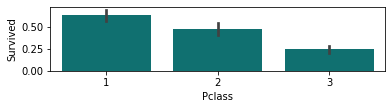

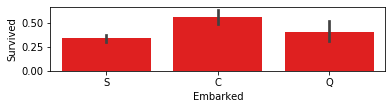

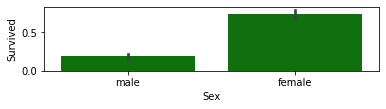

In [567]:
plt.subplot(311)
sns.barplot("Pclass", "Survived", data=data, color="teal")
print(data["Pclass"].value_counts())
plt.show()
plt.subplot(312)
sns.barplot("Embarked", "Survived", data=data, color="red")
plt.show()
plt.subplot(313)
sns.barplot("Sex", "Survived",data=data, color="green")
plt.show()

In [568]:
#funkcja tworzaca zmienne typu "dummies"
def getting_dummies(data,cat_variables):
    output = pd.DataFrame()
    for column in cat_variables:
        encoded = pd.get_dummies(data[column],drop_first=True)
        output = pd.concat([output,encoded],axis=1)     
    return pd.concat([output, data.drop(cat_variables,axis=1)],axis=1)

#function to make inside regression in order to  fill missing values in more robust way
def filling_values_regression(data, variable_to_fill):
    train = sm.add_constant(data.dropna())
    test = sm.add_constant(data[data[variable_to_fill].isnull()].drop([variable_to_fill],axis=1))
    lm = OLS(train[variable_to_fill],train.drop([variable_to_fill],axis=1)).fit()
    data[variable_to_fill].fillna(value=lm.predict(test),inplace=True)
    return data


In [569]:
data = getting_dummies(data=data, cat_variables=["Sex", "Pclass", "Embarked"])
submission_data = getting_dummies(data=submission_data, cat_variables=["Sex", "Pclass", "Embarked"])
filling_values_regression(data,"Age")
filling_values_regression(submission_data,"Age")

,male,2,3,Q,S,Age,SibSp,Parch,Fare
0,1,0,1,1,0,34.500000,0,0,7.8292
1,0,0,1,0,1,47.000000,1,0,7.0000
2,1,1,0,1,0,62.000000,0,0,9.6875
3,1,0,1,0,1,27.000000,0,0,8.6625
4,0,0,1,0,1,22.000000,1,1,12.2875
...,...,...,...,...,...,...,...,...,...
413,1,0,1,0,1,25.402974,0,0,8.0500
414,0,0,0,0,0,39.000000,0,0,108.9000
415,1,0,1,0,1,38.500000,0,0,7.2500
416,1,0,1,0,1,25.402974,0,0,8.0500


# Feature extraction


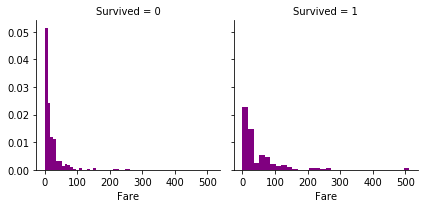

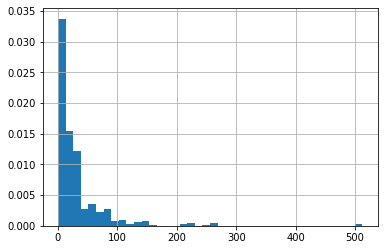

In [570]:
g = sns.FacetGrid(data, col="Survived")
g.map(plt.hist,"Fare",color="purple",bins=30,density=True)
plt.show()
data["Fare"].hist(bins=40,density=True)
plt.show()
qt_25 = data["Fare"].describe()[4]#0.25 quantile
data["low_fare"] = (data["Fare"]<30).astype(int)
submission_data["low_fare"] = (submission_data["Fare"]<50).astype(int)
COLUMNS_TO_DROP.append("Fare")

In [571]:
data

,male,2,3,Q,S,Survived,Age,SibSp,Parch,Fare,low_fare
0,1,0,1,0,1,0,22.000000,1,0,7.2500,1
1,0,0,0,0,0,1,38.000000,1,0,71.2833,0
2,0,0,1,0,1,1,26.000000,0,0,7.9250,1
3,0,0,0,0,1,1,35.000000,1,0,53.1000,0
4,1,0,1,0,1,0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
886,1,1,0,0,1,0,27.000000,0,0,13.0000,1
887,0,0,0,0,1,1,19.000000,0,0,30.0000,0
888,0,0,1,0,1,0,24.016862,1,2,23.4500,1
889,1,0,0,0,0,1,26.000000,0,0,30.0000,0


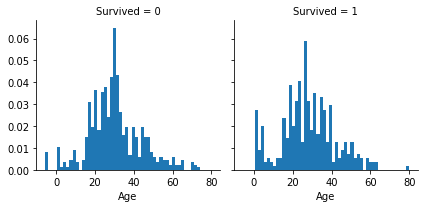

In [572]:
g = sns.FacetGrid(data, col='Survived')
g.map(plt.hist, 'Age', bins=50,density=True)
plt.show()

data["baby"] = (data["Age"]<6).astype(int)
submission_data["baby"] = (submission_data["Age"]<6).astype(int)
COLUMNS_TO_DROP.append("Age")

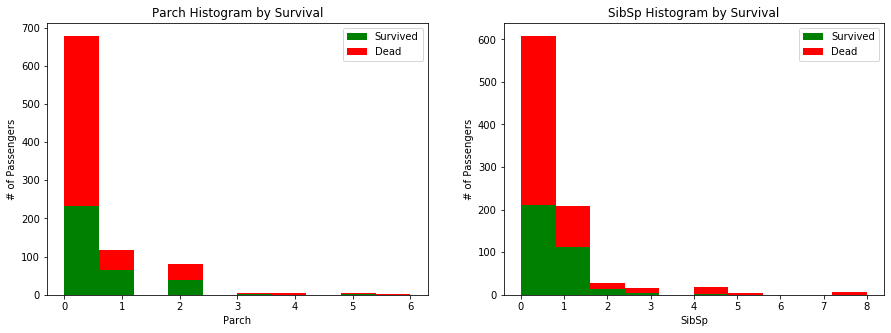

In [573]:
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.hist(x = [data[data["Survived"]==1]["Parch"], data[data["Survived"]==0]["Parch"]], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title("Parch Histogram by Survival")
plt.xlabel("Parch")
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(122)
plt.hist(x = [data[data["Survived"]==1]["SibSp"], data[data["Survived"]==0]["SibSp"]], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title("SibSp Histogram by Survival")
plt.xlabel("SibSp")
plt.ylabel('# of Passengers')
plt.legend()
plt.show()

#data["Parch_is_alone"] = (data["Parch"] == 0).astype(int)
#data["SibSp_is_alone"] = (data["SibSp"] == 0).astype(int)
#submission_data["Parch_is_alone"] = (submission_data["Parch"] == 0).astype(int)
#submission_data["SibSp_is_alone"] = (submission_data["SibSp"] == 0).astype(int)
#COLUMNS_TO_DROP.append("Parch")
#COLUMNS_TO_DROP.append("SibSp")

In [574]:
#Preparing training and test set
data.drop(COLUMNS_TO_DROP,axis=1,inplace=True)

train = data.iloc[:int(LEN*0.8),]
test = data.iloc[int(LEN*0.8):,]
train

,male,2,3,Q,S,Survived,SibSp,Parch,low_fare,baby
0,1,0,1,0,1,0,1,0,1,0
1,0,0,0,0,0,1,1,0,0,0
2,0,0,1,0,1,1,0,0,1,0
3,0,0,0,0,1,1,1,0,0,0
4,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
707,1,0,0,0,1,1,0,0,1,0
708,0,0,0,0,1,1,0,0,0,0
709,1,0,1,0,0,1,1,1,1,0
710,0,0,0,0,0,1,0,0,0,0


In [597]:
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit



y_train = train["Survived"]
x_train = train.drop(["Survived"],axis=1)
y_test = test["Survived"]
x_test = test.drop(["Survived"],axis=1)

In [589]:
from statsmodels.api import OLS
model = Logit(y_train,sm.add_constant(x_train)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.449096
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            9
Date:                Wed, 15 Apr 2020   Pseudo R-squ.:                  0.3287
Time:                        11:41:53   Log-Likelihood:                -319.76
converged:                       True   LL-Null:                       -476.29
Covariance Type:            nonrobust   LLR p-value:                 4.396e-62
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9812      0.339      8.783      0.000       2.316       3.646
male          -2.7964      0.

In [604]:
#model = LogisticRegression(max_iter=1000).fit(x_train,y_train)
def score(model, data_matrix, labels):
    predictions = [1 if (i > 0.5) else 0 for i in model.predict(sm.add_constant(data_matrix))]
    score = sum((predictions == labels)) /len(labels)
    return score

score(model,x_test,y_test)

0.8491620111731844

# Adjusting the model

In [581]:
model = Logit(y_train,sm.add_constant(x_train.drop(["Q"],axis=1))).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.449100
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Wed, 15 Apr 2020   Pseudo R-squ.:                  0.3286
Time:                        11:38:10   Log-Likelihood:                -319.76
converged:                       True   LL-Null:                       -476.29
Covariance Type:            nonrobust   LLR p-value:                 6.805e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9891      0.320      9.339      0.000       2.362       3.616
male          -2.7985      0.

In [606]:
model = Logit(y_train,sm.add_constant(x_train.drop(["Q",2],axis=1))).fit()
print(model.summary())
#print(x_train.columns)
print(score(model,x_test.drop(["Q",2],axis=1),y_test))
COLUMNS_TO_DROP.append("Q")
COLUMNS_TO_DROP.append(2)

Optimization terminated successfully.
         Current function value: 0.449554
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Wed, 15 Apr 2020   Pseudo R-squ.:                  0.3280
Time:                        11:49:07   Log-Likelihood:                -320.08
converged:                       True   LL-Null:                       -476.29
Covariance Type:            nonrobust   LLR p-value:                 1.346e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9656      0.318      9.325      0.000       2.342       3.589
male          -2.7865      0.

In [578]:
submission_data.dropna(inplace=True)
submission_data.drop(COLUMNS_TO_DROP, axis=1, inplace=True)
print(submission_data.head())
final_submission = pd.DataFrame(data={"PassengerId":pass_id,
    "Survived":[1 if (i > 0.5) else 0 for i in model.predict(sm.add_constant(submission_data.to_numpy()).reshape(418,-1))]
        })
print(final_submission.head())
final_submission.to_csv(path_or_buf="submission_03.csv",index=False)



   male  2  3  Q  S  SibSp  Parch  low_fare  baby
0     1  0  1  1  0      0      0         1     0
1     0  0  1  0  1      1      0         1     0
2     1  1  0  1  0      0      0         1     0
3     1  0  1  0  1      0      0         1     0
4     0  0  1  0  1      1      1         1     0
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         0
